In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files
from tensorflow.python.keras.utils import np_utils # corrected
from keras.preprocessing.image import array_to_img, img_to_array, load_img

/tmp/ipykernel_4739/3655898270.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-06-14 08:13:28.071874: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-14 08:13:28.553938: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX

In [4]:
train_dir = '/home/ahsan-pmylsp/Desktop/talha bhai/dataset/train'
val_dir = '/home/ahsan-pmylsp/Desktop/talha bhai/dataset/val'
test_dir='/home/ahsan-pmylsp/Desktop/talha bhai/dataset/test'

In [5]:
print("good")
print("Training Images:",len(os.listdir(train_dir+'/'+'good')))
print("Testing Images:",len(os.listdir(test_dir+'/'+'good')))
print("Validation Images:",len(os.listdir(val_dir+'/'+'good')))

good
Training Images: 16218
Testing Images: 2318
Validation Images: 4634


In [6]:
# Rescaling all Images by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Training images are put in batches of 10
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Validation images are put in batches of 10
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

Found 17917 images belonging to 5 classes.
Found 5119 images belonging to 5 classes.


In [6]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True 

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.summary()

/home/ahsan-pmylsp/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 199, 199, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 98, 98, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 48, 48, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,917,477 (72.16 MB)

 Trainable params: 18,917,477 (72.16 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

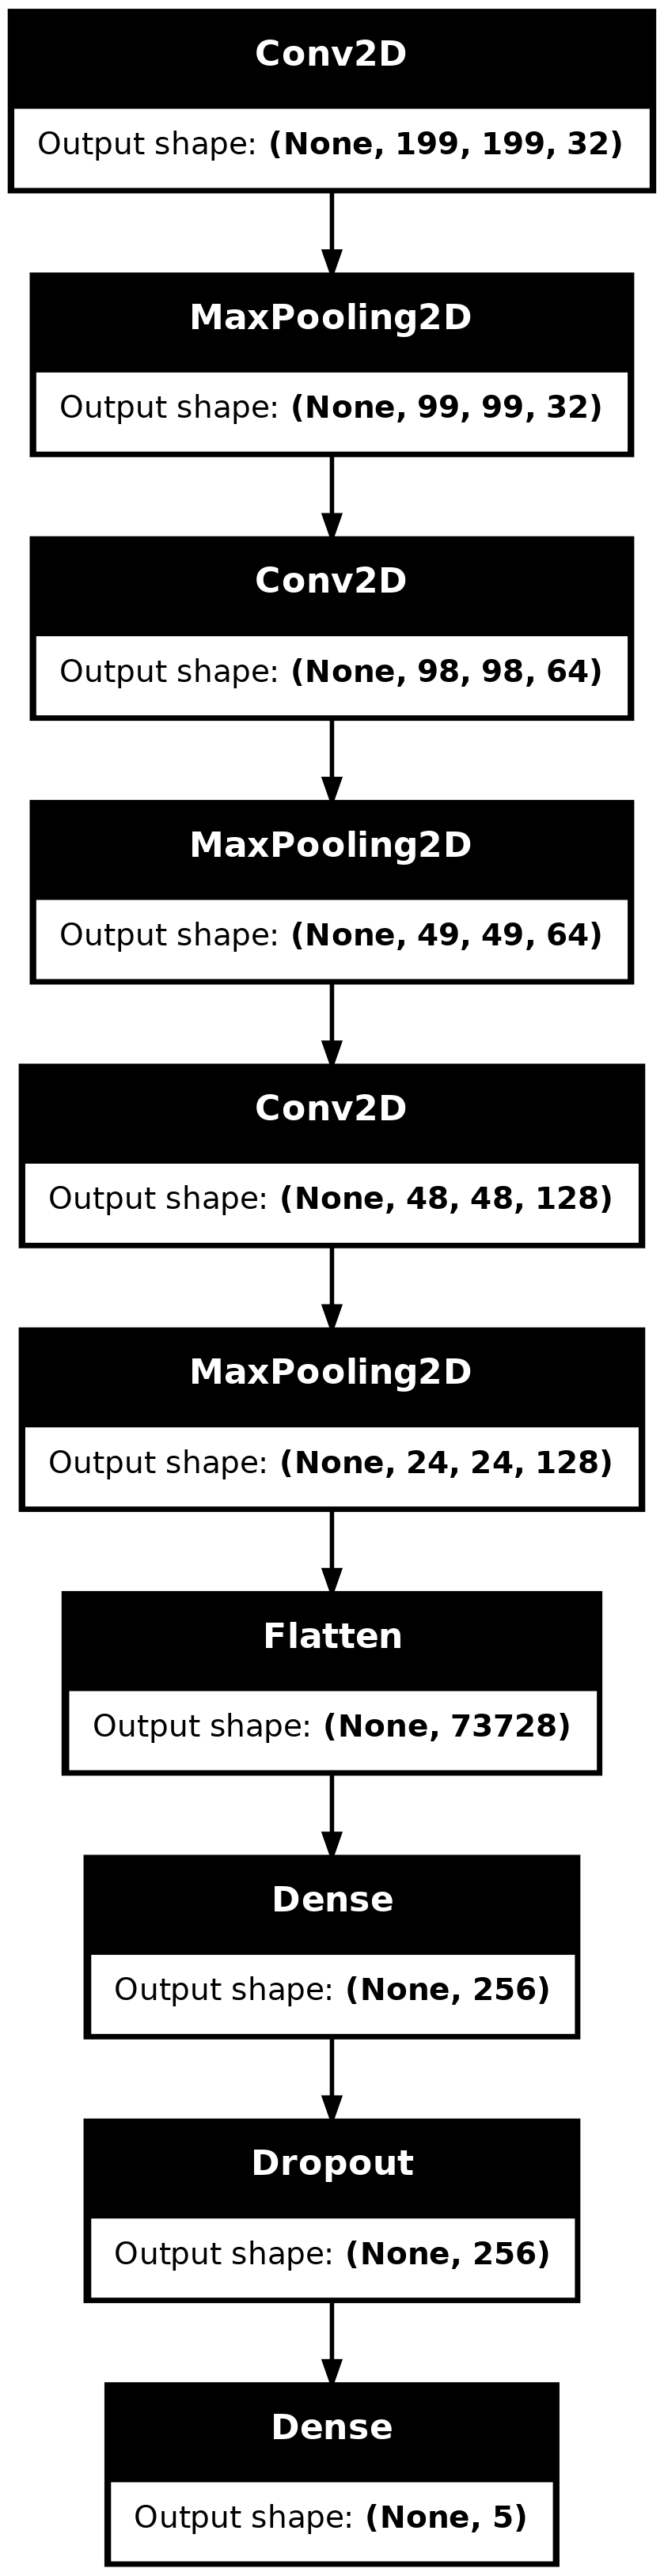

In [13]:
tf.keras.utils.plot_model(
    model,
    to_file='cnn_architecture.png',
    show_shapes=True
)

In [14]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=1,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

/home/ahsan-pmylsp/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1792/1792 ━━━━━━━━━━━━━━━━━━━━ 650s 361ms/step - accuracy: 0.8926 - loss: 0.6934 - val_accuracy: 0.9053 - val_loss: 0.4432


In [15]:
model.save("complete_model.h5")

Found 2564 images belonging to 5 classes.
  2/257 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.6750 - loss: 1.3465  

/home/ahsan-pmylsp/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


257/257 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.8907 - loss: 0.5005
Test Loss: 0.44817519187927246
Test Accuracy: 0.904056191444397
Class indices: {'good': 0, 'hole': 1, 'objects': 2, 'oil spot': 3, 'thread error': 4}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Predictions:
 [[0.91794324 0.01056886 0.03145904 0.02622653 0.01380225]
 [0.9189112  0.01012001 0.03209181 0.02532008 0.01355686]
 [0.91859937 0.01022703 0.03198769 0.02555182 0.01363411]
 [0.88263714 0.01446788 0.05038575 0.03247035 0.02003889]
 [0.9183225  0.0102828  0.03203475 0.02566835 0.01369161]
 [0.91918224 0.00978626 0.03303421 0.02458148 0.01341574]
 [0.9198989  0.00987092 0.03208796 0.02479598 0.0133462 ]
 [0.9184495  0.01040706 0.0315384  0.02590958 0.01369547]
 [0.9178593  0.01058536 0.03148337 0.02625528 0.0138167 ]
 [0.91823274 0.01042335 0.03166889 0.0259421  0.01373295]]
True Labels:
 [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]

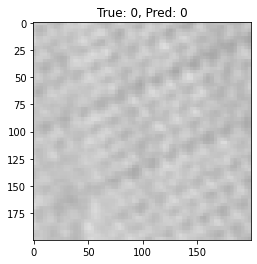

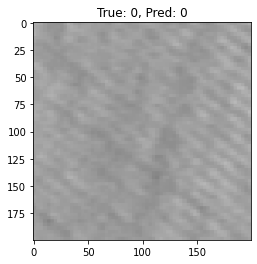

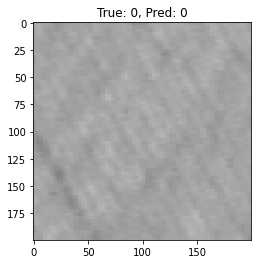

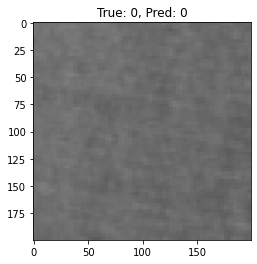

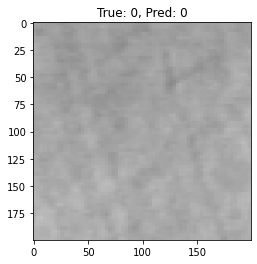

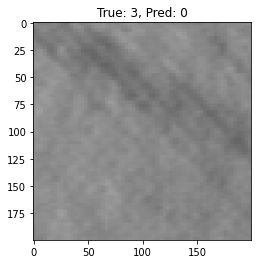

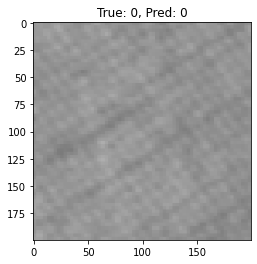

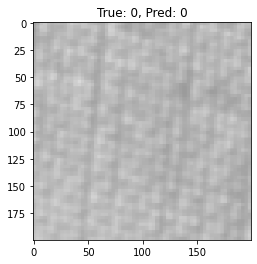

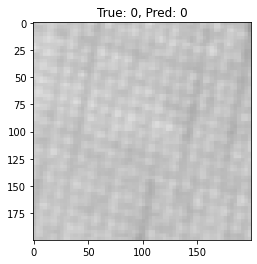

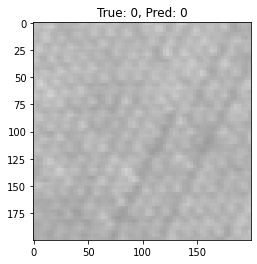

In [7]:
# Step 1: Load the saved model
model = tf.keras.models.load_model("complete_model.h5")

# Step 2: Create a test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Step 3: Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Step 4: Make predictions
import numpy as np

# Get the class indices
class_indices = test_generator.class_indices
print("Class indices:", class_indices)

# Predict on a batch of test images
test_images, test_labels = next(test_generator)
predictions = model.predict(test_images)

# Print the predictions
print("Predictions:\n", predictions)
print("True Labels:\n", test_labels)

# Convert predictions and true labels from one-hot encoding to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Display the predicted and true labels
print("Predicted Classes:\n", predicted_classes)
print("True Classes:\n", true_classes)

# Display the test images with predicted and true labels
import matplotlib.pyplot as plt

for i in range(len(test_images)):
    plt.imshow(test_images[i])
    plt.title(f"True: {true_classes[i]}, Pred: {predicted_classes[i]}")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Class: class0
Prediction Confidence: [[0.9142606  0.01059414 0.03467702 0.02616445 0.01430378]]


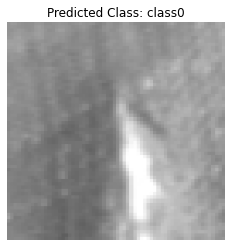

In [8]:
from tensorflow.keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = load_model("complete_model.h5")

# Preprocess the image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(200, 200))
    img_array = img_to_array(img)
    img_array /= 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Make a prediction
def predict_image(model, image_path):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    predicted_class = np.argmax(prediction, axis=1)[0]
    return predicted_class, prediction

# Define the class labels
class_labels = {0: 'class0', 1: 'class1', 2: 'class2', 3: 'class3', 4: 'class4'}

# Path to your own image
image_path = '/home/ahsan-pmylsp/Desktop/talha bhai/dataset/test/hole/027_patch4-4.png'

# Make a prediction
predicted_class, prediction = predict_image(model, image_path)
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Prediction Confidence: {prediction}")

# Display the image with the prediction
def display_prediction(image_path, predicted_class):
    img = load_img(image_path, target_size=(200, 200))
    plt.imshow(img)
    plt.title(f"Predicted Class: {class_labels[predicted_class]}")
    plt.axis('off')
    plt.show()

display_prediction(image_path, predicted_class)
